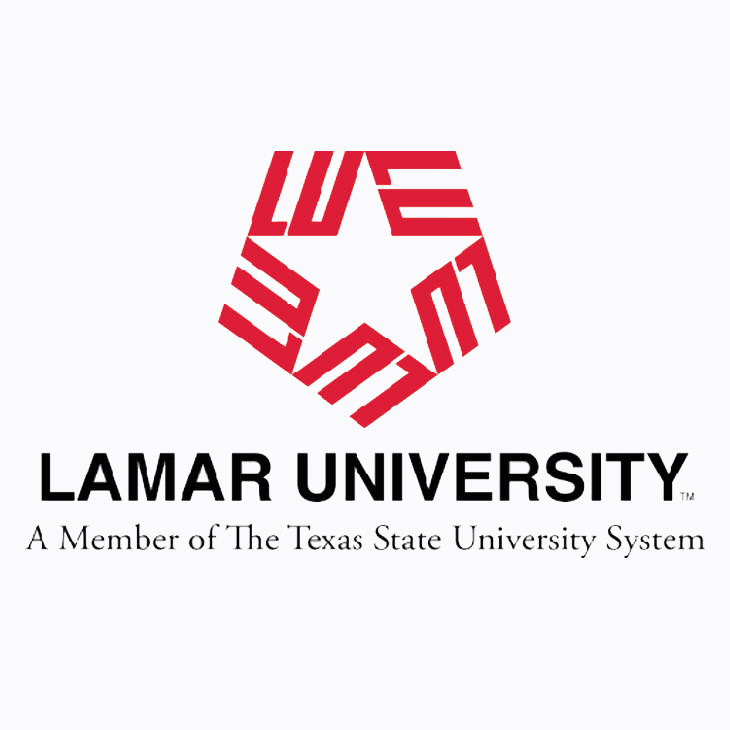

<table border="1" align="center">
    <tr style="background-color:#ADD8E6 ;">
        <td>
            <h1><font color='red'><center>Prediction of ozone in houston</center></font></h1>
        </td>
    </tr>
    <tr style="background-color:#ADD8E6 ;">
        <td>
        <h3><font color='blue'> <center> Vandan B Gadhiya </center> </font></h3>
        <h3><font color='blue'> <center> Azeez Asiwaju </center> </font></h3>
        <h3><font color='blue'> <center> Azucena Lopez </center> </font></h3>
        <h3><font color='blue'> <center> MD Mahbubur Rahman </center> </font></h3>
        </td>
    </tr>    
    </table>

<h2><font color="red"> Load Libraries </font> </h2>

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

<h2><font color="red"> Change working directory and Load the excel file as dataframe</font> </h2> 

In [2]:
os.chdir('C:/Users/keyur/Downloads') # set working directory
fname = 'O3_Var.xlsx' 
O3_var_a = pd.read_excel(fname) #load the data file as pandas dataframe
O3_var_a.head(5)

,Date,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
0,2022-01-01,NaN,22.0,28.0,21.0,28.0,26.0,30.0,27.0,76.0,57.0,12.4,0.00,0.002
1,2022-01-02,NaN,23.0,34.0,32.0,30.0,30.0,30.0,30.0,50.0,55.9,20.3,0.01,0.458
2,2022-01-03,30.0,26.0,36.0,30.0,35.0,35.0,NaN,29.0,43.0,44.0,5.0,0.00,0.228
3,2022-01-04,NaN,32.0,43.0,30.0,38.0,39.0,39.0,42.0,51.0,59.8,6.9,0.00,0.087
4,2022-01-05,28.0,31.0,42.0,30.0,38.0,40.0,36.0,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Set date as index </font> </h2> 

In [3]:
O3_var = O3_var_a.set_index('Date') #set date as index for dataframe
O3_var.head(5)

,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
Date,,,,,,,,,,,,,
2022-01-01,NaN,22.0,28.0,21.0,28.0,26.0,30.0,27.0,76.0,57.0,12.4,0.00,0.002
2022-01-02,NaN,23.0,34.0,32.0,30.0,30.0,30.0,30.0,50.0,55.9,20.3,0.01,0.458
2022-01-03,30.0,26.0,36.0,30.0,35.0,35.0,NaN,29.0,43.0,44.0,5.0,0.00,0.228
2022-01-04,NaN,32.0,43.0,30.0,38.0,39.0,39.0,42.0,51.0,59.8,6.9,0.00,0.087
2022-01-05,28.0,31.0,42.0,30.0,38.0,40.0,36.0,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Replace the No values with mean of column in dataframe </font> </h2> 

In [4]:
O3_var.columns = O3_var.columns.to_series().apply(lambda x: x.strip()) #remove whitespaces from column names 
c = ['Clinton C403/C304/AH113','Houston Westhollow C410/C3003','West Houston C554','La Porte Sylvan Beach C556','Mercer Arboretum C557','Meyer Park C561','Houston Aldine C8/AF108/X1502','UH Moody Tower C695','temp','humidity','wind speed','radiation']
O3_var[c] = O3_var[c].fillna(O3_var[c].mean()) #fill the no values with the mean of that perticular column 
O3_var.head(5)

,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
Date,,,,,,,,,,,,,
2022-01-01,37.126344,22.0,28.0,21.0,28.0,26.0,30.000000,27.0,76.0,57.0,12.4,0.00,0.002
2022-01-02,37.126344,23.0,34.0,32.0,30.0,30.0,30.000000,30.0,50.0,55.9,20.3,0.01,0.458
2022-01-03,30.000000,26.0,36.0,30.0,35.0,35.0,35.133333,29.0,43.0,44.0,5.0,0.00,0.228
2022-01-04,37.126344,32.0,43.0,30.0,38.0,39.0,39.000000,42.0,51.0,59.8,6.9,0.00,0.087
2022-01-05,28.000000,31.0,42.0,30.0,38.0,40.0,36.000000,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Select relevant data for one site and Get summary </font> </h2> 

In [5]:
O3_s7 = O3_var[['Houston Aldine C8/AF108/X1502','temp','humidity','wind speed','precipatation','radiation']] #select data columns for relevant site 
O3_s7.rename(columns = {'Houston Aldine C8/AF108/X1502':'ozone'}, inplace = True) #replace the site name by ozone
O3_s7.describe() #get summary of ozone data 

,ozone,temp,humidity,wind speed,precipatation,radiation
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,35.133333,69.345324,67.654415,9.215274,0.117613,0.276451
std,10.980743,14.960896,13.531606,3.974844,0.419777,0.129748
min,7.000000,24.000000,23.000000,0.000000,0.000000,0.001000
25%,28.000000,58.000000,60.050000,6.200000,0.000000,0.180500
50%,35.000000,72.000000,69.000000,8.300000,0.000000,0.276451
75%,42.000000,83.000000,76.700000,11.900000,0.010000,0.380500
max,71.000000,94.000000,97.400000,26.000000,4.050000,0.609000


<h2><font color="red"> Plot correlation matrix </font> </h2> 

In [6]:
corr_s7= O3_s7.corr() #get correlation matrix 
corr_s7

,ozone,temp,humidity,wind speed,precipatation,radiation
ozone,1.000000,0.349405,-0.391312,-0.277779,-0.171419,0.610487
temp,0.349405,1.000000,0.155782,-0.156617,-0.031757,0.469185
humidity,-0.391312,0.155782,1.000000,0.190850,0.255851,-0.435051
wind speed,-0.277779,-0.156617,0.190850,1.000000,0.139356,-0.116299
precipatation,-0.171419,-0.031757,0.255851,0.139356,1.000000,-0.229734
radiation,0.610487,0.469185,-0.435051,-0.116299,-0.229734,1.000000


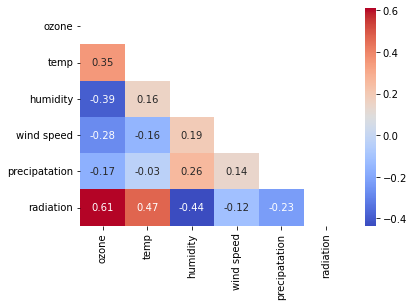

In [7]:
mask = np.triu(np.ones_like(corr_s7)) #mask the upper side table 
sns.heatmap(corr_s7, mask=mask, cmap='coolwarm', annot=True, fmt='.2f') #plot heatmap of the correlation matrix
plt.show()

<h1><font color="red"> Regression model 1 </font> </h1> 

<h3><font color="red"> Develop model 1 for temprature and radiation </font> </h3> 

In [8]:
X = O3_s7[['temp','radiation']].values #define independent(x) variables
y = O3_s7['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [10]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     99.85
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.12e-34
Time:                        01:46:39   Log-Likelihood:                -1202.3
No. Observations:                 335   AIC:                             2411.
Df Residuals:                     332   BIC:                             2422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6398      2.242      7.421      0.000      12.229      21.050
x1             0.0748      0.036      2.060      0.040       0.003       0.146
x2            48.1023      4.285     11.226      0.000      39.673      56.531
==============================================================================
Omnibus:                        8.860   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.779
Skew:                           0.375   Prob(JB):                       0.0124
Kurtosis:                       3.256   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [12]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred  

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [13]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 67.67192425073911


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

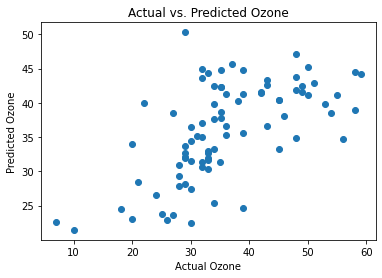

In [14]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [15]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.08916643646795774, 0.13598918608350746)

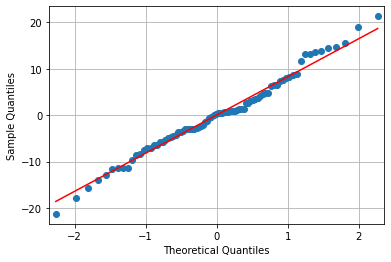

In [16]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [17]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(10.907492944977362,
 0.3647704767958734,
 1.0837068589451904,
 0.37408486966394155)

<h1><font color="red"> Regression model 2 </font> </h1> 

<h3><font color="red"> Develop model 2 for radiation and precipitation </font> </h3> 

In [18]:
X = O3_s7[['precipatation','radiation']].values #define independent(x) variables
y = O3_s7['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [20]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     96.73
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           7.92e-34
Time:                        01:46:42   Log-Likelihood:                -1204.3
No. Observations:                 335   AIC:                             2415.
Df Residuals:                     332   BIC:                             2426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8461      1.202     17.349      0.000      18.482      23.210
x1            -0.6005      1.090     -0.551      0.582      -2.744       1.543
x2            51.8802      3.879     13.376      0.000      44.251      59.510
==============================================================================
Omnibus:                       12.357   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.749
Skew:                           0.436   Prob(JB):                      0.00170
Kurtosis:                       3.390   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [22]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [23]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 66.34335788434798


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

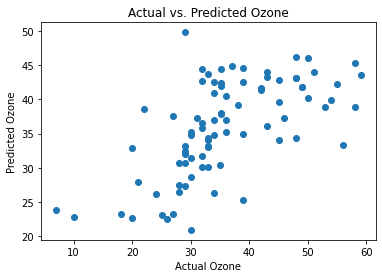

In [24]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [25]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.08007698337675928, 0.2453193093158549)

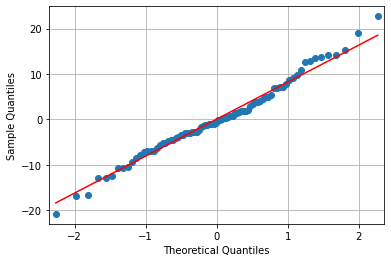

In [26]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [27]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(9.785771244753047, 0.459485225290592, 0.9689054359247965, 0.47044316529767216)

<h1><font color="red"> Regression model 3 </font> </h1> 

<h3><font color="red"> Develop model 3 for wind speed and humidity </font> </h3> 

In [28]:
X = O3_s7[['wind speed','humidity']].values #define independent(x) variables
y = O3_s7['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [30]:
model = sm.OLS(y_train, X_train).fit() #fit the model with training data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     37.82
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.60e-15
Time:                        01:46:46   Log-Likelihood:                -1246.8
No. Observations:                 335   AIC:                             2500.
Df Residuals:                     332   BIC:                             2511.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.3224      2.949     20.118      0.000      53.522      65.123
x1            -0.5748      0.139     -4.143      0.000      -0.848      -0.302
x2            -0.2804      0.042     -6.650      0.000      -0.363      -0.197
==============================================================================
Omnibus:                       15.896   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.794
Skew:                           0.529   Prob(JB):                     0.000226
Kurtosis:                       3.291   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [32]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [33]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 83.51406053993509


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

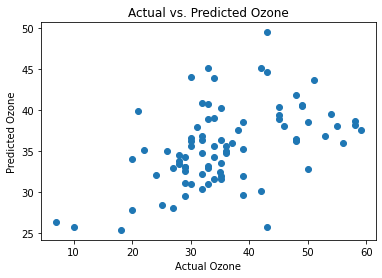

In [34]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [35]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.08987383037249641, 0.12748048242652799)

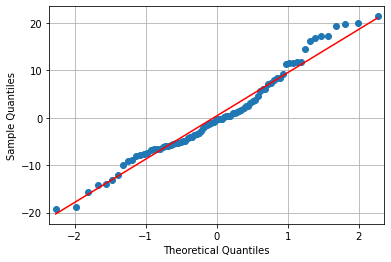

In [36]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [37]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(9.197277336440466, 0.5134893108889984, 0.9089928034125243, 0.525025099635563)

<h1><font color="red"> Regression model 4 </font> </h1> 

<h3><font color="red"> Develop model 4 for temprature, radiation, precipatation, wind speed and humidity </font> </h3> 

In [38]:
X = O3_s7[['temp','radiation','precipatation','wind speed','humidity']].values #define independent(x) variables
y = O3_s7['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [40]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     49.76
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.68e-38
Time:                        01:46:51   Log-Likelihood:                -1186.8
No. Observations:                 335   AIC:                             2386.
Df Residuals:                     329   BIC:                             2409.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9706      3.449      8.978      0.000      24.185      37.756
x1             0.1309      0.041      3.205      0.001       0.051       0.211
x2            35.6285      5.254      6.781      0.000      25.293      45.964
x3             0.1405      1.060      0.133      0.895      -1.945       2.225
x4            -0.4101      0.120     -3.414      0.001      -0.646      -0.174
x5            -0.1619      0.046     -3.518      0.000      -0.252      -0.071
==============================================================================
Omnibus:                       10.367   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.481
Skew:                           0.424   Prob(JB):                      0.00530
Kurtosis:                       3.176   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [42]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [43]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 57.197106929500556


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

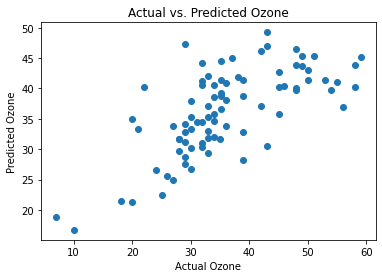

In [44]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [45]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.06559718343863546, 0.5540456818587822)

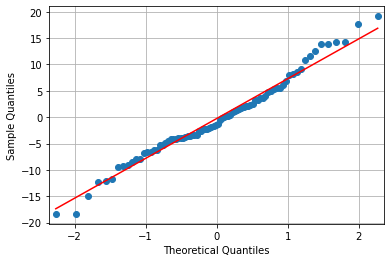

In [46]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [47]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(10.058704680281531, 0.4353581126325135, 0.987478919800774, 0.4540809094316969)